# Algorytmy sortowania

#### Przygotowanymi przeze mnie algorytmami sortowania są:

- Sortowanie przez wybieranie
- Sortowanie przez wstawianie
- Sortowanie przez scalanie
- Sortowanie szybkie
- Sortowanie przez zliczanie

Każdy z algorytmów jest niezależną funkcją, która operuje na tablicy danych. Zostały one zaimplementowane w języku Python 3.

Aby uniezależnić czas wykonania programów od generowania danych do posortowania, robię to przed rozpoczęciem testów. Czas każdego algorytmu sprawdzam na listach o dziesięciu różnych wielkościach. Dla algorytmów naiwych są one z przedziału 4000-40000, a dla pozostałych z przedziału 200000-2000000, a więc pięćdziesiąt razy większe. Każda wielkość ma reprezentację w postaci danych losowych, posortowanych rosnąco, posortowanych malejąco, oraz V-kształtnych i A-kształtych, czyli połowicznie wstępnie posortowanych. Do mierzenia czasu używam magicznej funkcji `%timeit` Jupyter Notebooka, dzięki czemu uzyskuję średni czas co najmniej kilku pomiarów. Algorytmy naiwne i szybkie zostały podsumowane na wykresach.

In [1]:
import random
import copy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 10

SIZES = [(n+1)*200000 for n in range(N)]
SIZES_s = [(n+1)*4000 for n in range(N)]
DANE = ['Losowe', 'Posortowane rosnąco', 'Posortowane malejąco', 'A-kształtne', 'V-kształtne']

s = 0
e = 50000000

TAB_random = {}
TAB_asc = {}
TAB_desc = {}
TAB_v = {}
TAB_a = {}
TAB_part = {}

In [2]:
%%time
for n in SIZES:
    TAB_random[n] = [random.randint(s, e) for _ in range(n)]
    TAB_asc[n] = list(sorted([random.randint(s, e) for _ in range(n)]))
    TAB_desc[n] = list(sorted([random.randint(s, e) for _ in range(n)], reverse=True))
    TAB_v[n] = list(sorted([random.randint(s, e) for _ in range(n//2)], reverse=True)) + list(sorted([random.randint(s, e) for _ in range(n//2)]))
    TAB_a[n] = list(sorted([random.randint(s, e) for _ in range(n//2)])) + list(sorted([random.randint(s, e) for _ in range(n//2)], reverse=True))
    
for n in SIZES_s:
    TAB_random[n] = [random.randint(s, e) for _ in range(n)]
    TAB_asc[n] = list(sorted([random.randint(s, e) for _ in range(n)]))
    TAB_desc[n] = list(sorted([random.randint(s, e) for _ in range(n)], reverse=True))
    TAB_v[n] = list(sorted([random.randint(s, e) for _ in range(n//2)], reverse=True)) + list(sorted([random.randint(s, e) for _ in range(n//2)]))
    TAB_a[n] = list(sorted([random.randint(s, e) for _ in range(n//2)])) + list(sorted([random.randint(s, e) for _ in range(n//2)], reverse=True))

print("Wygenerowano dane.")

Wygenerowano dane.
Wall time: 53.1 s


In [3]:
wyniki_naiwne = {'Selection Sort':[], 'Insertion Sort':[], 'Bubble Sort':[]}
wyniki_naiwne_max = {'Selection Sort':[], 'Insertion Sort':[], 'Bubble Sort':[]}

wyniki_szybkie = {'Merge Sort':[], 'Quick Sort':[], 'Counting Sort':[]}
wyniki_szybkie_max = {'Merge Sort':[], 'Quick Sort':[], 'Counting Sort':[]}

## Algorytmy naiwne

### Sortowanie przez wybieranie
Pierwszym zaimplementowanym przeze mnie algorytmem jest sortowanie przez wybieranie. Do jego stworzenia potrzebna jest prosta funkcja minium. Podczas implementacji należy wziąć pod uwagę, że zamieniając miejscami elementy po wyszukaniu indeksu minimum, trzeba dodać wartość kroku pętli do tego indeksu.

In [4]:
def min(t):
    index = 0
    for i in range(len(t)):
        if t[i] < t[index]:
            index = i
    return index

def SelectionSort(tab):
    for i in range(len(tab)):
        index = min(tab[i:])
        tab[i], tab[index+i] = tab[index+i], tab[i]
    return tab

In [5]:
t = {}
res = 0
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_random[SIZES_s[i]])
    res = %timeit -o -r5 SelectionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
    wyniki_naiwne['Selection Sort'].append(time)
wyniki_naiwne_max['Selection Sort'].append(time)

Testuję dla:  4000 -> 379 ms ± 12.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 1.26 s ± 43.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 2.8 s ± 3.55 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 5.1 s ± 2.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 8.15 s ± 10.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 11.9 s ± 10.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 16.4 s ± 8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 21.7 s ± 67.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 27.6 s ± 148 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 34.2 s ± 20.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [6]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_asc[SIZES_s[i]])
    res = %timeit -o -r5 SelectionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Selection Sort'].append(time)

Testuję dla:  4000 -> 311 ms ± 2.12 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 1.24 s ± 2.81 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 2.8 s ± 3.87 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 5.09 s ± 2.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 8.13 s ± 6.33 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 11.9 s ± 10.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 16.4 s ± 18.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 21.6 s ± 22.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 27.6 s ± 50.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 34.1 s ± 16.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [7]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_desc[SIZES_s[i]])
    res = %timeit -o -r5 SelectionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Selection Sort'].append(time)

Testuję dla:  4000 -> 323 ms ± 8.37 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 1.24 s ± 1.48 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 2.81 s ± 6.76 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 5.1 s ± 4.12 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 8.14 s ± 9.49 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 11.9 s ± 7.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 16.4 s ± 6.21 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 21.6 s ± 14.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 27.5 s ± 25.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 34.1 s ± 12.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [8]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_v[SIZES_s[i]])
    res = %timeit -o -r5 SelectionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Selection Sort'].append(time)

Testuję dla:  4000 -> 317 ms ± 7.69 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 1.26 s ± 22.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 2.82 s ± 5.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 5.09 s ± 5.97 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 8.17 s ± 7.18 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 11.9 s ± 16.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 16.4 s ± 12.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 21.6 s ± 10.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 27.6 s ± 115 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 34.2 s ± 58.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [9]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_a[SIZES_s[i]])
    res = %timeit -o -r5 SelectionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Selection Sort'].append(time)

Testuję dla:  4000 -> 316 ms ± 7.86 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 1.24 s ± 4.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 2.77 s ± 3.78 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 5.06 s ± 4.69 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 8.08 s ± 6.86 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 11.8 s ± 20 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 16.3 s ± 4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 21.5 s ± 26.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 27.4 s ± 30 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 33.9 s ± 13 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


### Sortowanie przez wstawianie
Drugim zaimplementowanym naiwnym algorytmem jest sortowanie przez wstawianie. Istotne tutaj jest zapamiętanie wstawianego elementu i przesuwanie wszystkich elementów większych od niego, a następnie wstawienie go w odpowiednium miejscu.

In [10]:
def InsertionSort(tab):
    for i in range(1, len(tab)):
        el = tab[i]
        j = i
        while el < tab[j-1] and j > 0:
            tab[j] = tab[j-1]
            j = j - 1
        tab[j] = el
    return tab

In [11]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_random[SIZES_s[i]])
    res = %timeit -o -r5 InsertionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
    wyniki_naiwne['Insertion Sort'].append(time)
wyniki_naiwne_max['Insertion Sort'].append(time)

Testuję dla:  4000 -> 319 µs ± 3.43 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 640 µs ± 11.6 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 934 µs ± 60.4 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 1.28 ms ± 32.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 1.61 ms ± 37 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 1.92 ms ± 33.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 2.27 ms ± 51.8 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 2.59 ms ± 26.6 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 2.89 ms ± 19.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 3.25 ms ± 33.3 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [12]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_asc[SIZES_s[i]])
    res = %timeit -o -r5 InsertionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Insertion Sort'].append(time)

Testuję dla:  4000 -> 302 µs ± 2.29 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  8000 -> 615 µs ± 7.11 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  12000 -> 947 µs ± 11.3 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  16000 -> 1.28 ms ± 11.8 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  20000 -> 1.62 ms ± 15.2 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  24000 -> 1.95 ms ± 21.3 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  28000 -> 2.29 ms ± 10.7 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
Testuję dla:  32000 -> 2.61 ms ± 14.3 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
Testuję dla:  36000 -> 2.91 ms ± 9.74 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
Testuję dla:  40000 -> 3.2 ms ± 10.2 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)


In [13]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_desc[SIZES_s[i]])
    res = %timeit -o -r5 InsertionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Insertion Sort'].append(time)

Testuję dla:  4000 -> 309 µs ± 8.48 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 613 µs ± 22.5 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 970 µs ± 40.5 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 1.3 ms ± 36.6 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 1.56 ms ± 7.67 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 2.15 ms ± 6.05 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 2.26 ms ± 9.37 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 2.82 ms ± 11.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 2.87 ms ± 22 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 3.26 ms ± 6.58 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [14]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_v[SIZES_s[i]])
    res = %timeit -o -r5 InsertionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Insertion Sort'].append(time)

Testuję dla:  4000 -> 335 µs ± 20.4 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 812 µs ± 8.16 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 951 µs ± 43.8 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 1.28 ms ± 51.9 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 1.79 ms ± 50.4 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 1.91 ms ± 63.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 2.28 ms ± 116 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 2.59 ms ± 64.1 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 3.05 ms ± 278 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 3.32 ms ± 259 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [15]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_a[SIZES_s[i]])
    res = %timeit -o -r5 InsertionSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Insertion Sort'].append(time)

Testuję dla:  4000 -> 317 µs ± 26.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 643 µs ± 36.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 967 µs ± 12.8 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 1.42 ms ± 7.16 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 1.58 ms ± 10.9 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 1.9 ms ± 17.4 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 2.23 ms ± 30.5 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 2.88 ms ± 24.6 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 2.86 ms ± 34.3 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 3.22 ms ± 61.8 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


### Sortowanie bąbelkowe
Ten algorytm jest jednym z prostszych typów sortować. W jego implementacji dodatkowo umieściłem warunek, aby działanie pętli przerwało się kiedy liczba zamian będzie równa zeru.

In [16]:
def BubbleSort(tab):
    for j in range(len(tab)):
        op = 0
        for i in range(1, len(tab)):
            if tab[i-1] > tab[i]:
                tab[i-1], tab[i] = tab[i], tab[i-1]
                op = op + 1
        if(op == 0):
            break
    return tab

In [17]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_random[SIZES_s[i]])
    res = %timeit -o -r5 BubbleSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
    wyniki_naiwne['Bubble Sort'].append(time)
wyniki_naiwne_max['Bubble Sort'].append(time)

Testuję dla:  4000 -> 231 µs ± 2.33 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 464 µs ± 2.57 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 703 µs ± 3.13 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 1.11 ms ± 72.7 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 1.4 ms ± 82.1 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 1.66 ms ± 37.7 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 1.94 ms ± 45.1 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 2.25 ms ± 78.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 2.49 ms ± 8.07 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 2.59 ms ± 93.8 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [18]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_asc[SIZES_s[i]])
    res = %timeit -o -r5 BubbleSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Bubble Sort'].append(time)

Testuję dla:  4000 -> 259 µs ± 2.67 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  8000 -> 475 µs ± 24 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  12000 -> 701 µs ± 140 ns per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  16000 -> 957 µs ± 133 ns per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  20000 -> 1.22 ms ± 1.23 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  24000 -> 1.49 ms ± 1.92 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  28000 -> 1.75 ms ± 1.23 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  32000 -> 2.06 ms ± 75.9 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)
Testuję dla:  36000 -> 2.34 ms ± 130 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
Testuję dla:  40000 -> 2.55 ms ± 38.7 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)


In [19]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_desc[SIZES_s[i]])
    res = %timeit -o -r5 BubbleSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Bubble Sort'].append(time)

Testuję dla:  4000 -> 233 µs ± 2.21 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 468 µs ± 5.66 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 706 µs ± 4.47 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 964 µs ± 4.72 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 1.37 ms ± 36 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 1.67 ms ± 36.8 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 1.96 ms ± 44.5 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 2.23 ms ± 50.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 2.58 ms ± 99.4 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 2.9 ms ± 80.7 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [20]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_v[SIZES_s[i]])
    res = %timeit -o -r5 BubbleSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Bubble Sort'].append(time)

Testuję dla:  4000 -> 260 µs ± 2.28 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 523 µs ± 2.02 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 794 µs ± 1.46 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 1.06 ms ± 3.06 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 1.36 ms ± 3.97 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 1.64 ms ± 4.53 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 1.93 ms ± 6.57 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 2.2 ms ± 1.02 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 2.49 ms ± 3.51 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 2.78 ms ± 11.8 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [21]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES_s[i], end=' -> ')
    t[SIZES_s[i]] = copy.deepcopy(TAB_a[SIZES_s[i]])
    res = %timeit -o -r5 BubbleSort(t[SIZES_s[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_naiwne_max['Bubble Sort'].append(time)

Testuję dla:  4000 -> 232 µs ± 3 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  8000 -> 464 µs ± 2.94 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  12000 -> 710 µs ± 9.96 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  16000 -> 1.11 ms ± 244 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  20000 -> 1.23 ms ± 6.76 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  24000 -> 1.49 ms ± 2.84 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  28000 -> 1.76 ms ± 8.98 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  32000 -> 2.02 ms ± 6.21 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  36000 -> 2.28 ms ± 10.9 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  40000 -> 2.54 ms ± 8.69 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)


### Podsumowanie algorytmów naiwnych

In [22]:
df_naive = pd.DataFrame(wyniki_naiwne, index=SIZES_s)
df_naive

,Selection Sort,Insertion Sort,Bubble Sort
4000,0.378862,0.000319,0.000231
8000,1.260856,0.000640,0.000464
12000,2.802684,0.000934,0.000703
16000,5.101530,0.001284,0.001113
20000,8.154526,0.001612,0.001399
24000,11.915668,0.001921,0.001658
28000,16.388670,0.002270,0.001944
32000,21.657391,0.002593,0.002246
36000,27.646250,0.002892,0.002492
40000,34.239629,0.003245,0.002589


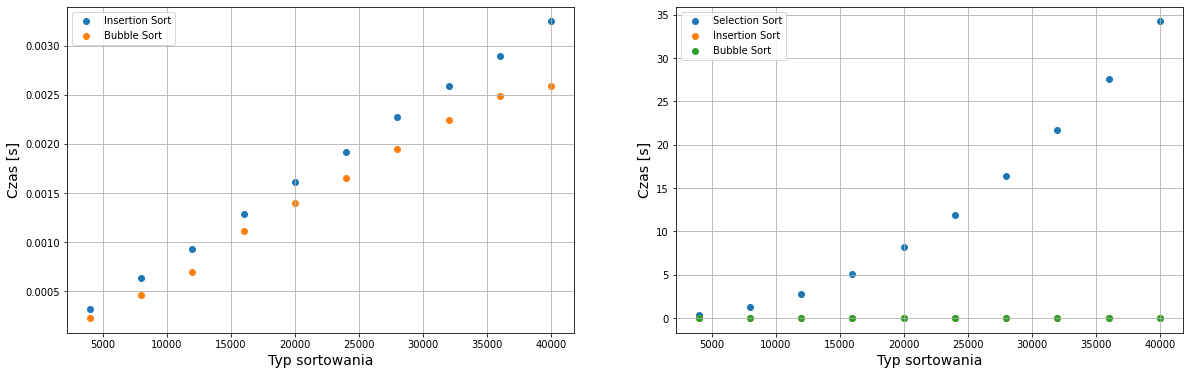

In [59]:
y1 = wyniki_naiwne['Selection Sort']
y2 = wyniki_naiwne['Insertion Sort']
y3 = wyniki_naiwne['Bubble Sort']

fig = plt.figure()
fig.set_size_inches(20, 6)

plt.subplot(1, 2, 1)
plt.scatter(SIZES_s, y2, label="Insertion Sort")
plt.scatter(SIZES_s, y3, label="Bubble Sort")
plt.xlabel('Typ sortowania', size=14)
plt.ylabel('Czas [s]', size=14)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(SIZES_s, y1, label="Selection Sort")
plt.scatter(SIZES_s, y2, label="Insertion Sort")
plt.scatter(SIZES_s, y3, label="Bubble Sort")
plt.xlabel('Typ sortowania', size=14)
plt.ylabel('Czas [s]', size=14)
plt.legend()
plt.grid()

plt.show()

Porównując algorytmy naiwne możemy zauważyć, że Bubble Sort radzi sobie nieco lepiej niż Insertion Sort. Oba te algorytmy dla danych wejściowych osiągnęły mniejsze czasy niż Selection Sort. Na wykresie tempo jego wzrostu przypomina funkcję kwadratową i dla stosunkowo niewielkich danych trwa już kilkadziesiąt sekund.

In [24]:
df_naive = pd.DataFrame(wyniki_naiwne_max, index=DANE)
df_naive

,Selection Sort,Insertion Sort,Bubble Sort
Losowe,34.239629,0.003245,0.002589
Posortowane rosnąco,34.121791,0.003198,0.002553
Posortowane malejąco,34.135257,0.003260,0.002896
A-kształtne,34.247986,0.003321,0.002778
V-kształtne,33.915908,0.003219,0.002536


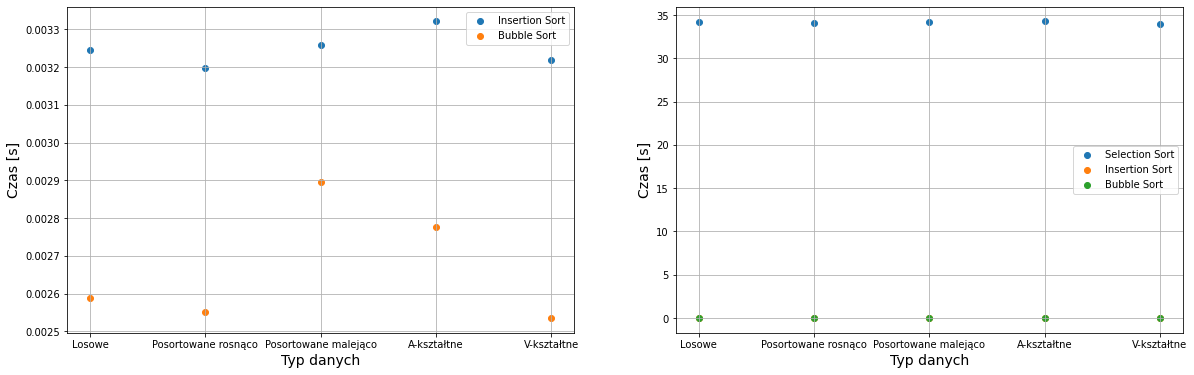

In [58]:
y1 = wyniki_naiwne_max['Selection Sort']
y2 = wyniki_naiwne_max['Insertion Sort']
y3 = wyniki_naiwne_max['Bubble Sort']

fig = plt.figure()
fig.set_size_inches(20, 6)

plt.subplot(1, 2, 1)
plt.scatter(DANE, y2, label="Insertion Sort")
plt.scatter(DANE, y3, label="Bubble Sort")
plt.xlabel('Typ danych', size=14)
plt.ylabel('Czas [s]', size=14)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(DANE, y1, label="Selection Sort")
plt.scatter(DANE, y2, label="Insertion Sort")
plt.scatter(DANE, y3, label="Bubble Sort")
plt.xlabel('Typ danych', size=14)
plt.ylabel('Czas [s]', size=14)
plt.legend()
plt.grid()

plt.show()

Jeśli chodzi o to jak algorytmy poradziły sobie z różnymi typami danych, dla Selection Sorta nie widać większej różnicy. Z kolei Bubble Sort poradził sobie zdecydowanie gorzej dla danych posortowanych malejąco, a także A-kształtnych oraz nieco lepiej dla danych posortowanych malejąco i V-kształtnych. Insertion Sort również osiągnął mniejszt czas dla danych już posortowanych, a także wwiększy czas dla danych A-kształtnych, jednak nie są to takie duże różnice.

### Sortowanie przez scalanie
Algorytm sortowania przez scalanie wydaje się pozornie prosty, ale kluczem do jego zaimplementowania jest napisanie odpowiednio funkcji scalania, która włoży w odpowiedniej kolejności wszystkie elementy do oryginalnej tablicy.

In [26]:
def MergeSort(tab):
    if len(tab) > 1:
        p = len(tab)//2

        A = tab[:p]
        B = tab[p:]

        MergeSort(A)
        MergeSort(B)

        i = 0
        j = 0
        k = 0

        a = len(A)
        b = len(B)

        while i < a and j < b:
            if A[i] < B[j]:
                tab[k] = A[i]
                i = i + 1
            else:
                tab[k] = B[j]
                j = j + 1
            k = k + 1

            if i == a:
                while j < b:
                    tab[k] = B[j]
                    j = j + 1
            if j == b:
                while i < a:
                    tab[k] = A[i]
                    i = i + 1
    return tab

In [27]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_random[SIZES[i]])
    res = %timeit -o -r5 MergeSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
    wyniki_szybkie['Merge Sort'].append(time)
wyniki_szybkie_max['Merge Sort'].append(time)

Testuję dla:  200000 -> 499 ms ± 7.96 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 1.09 s ± 18.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 1.74 s ± 56.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 2.39 s ± 73.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 3.09 s ± 96.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 3.88 s ± 102 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 4.54 s ± 141 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 5.36 s ± 163 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 6.1 s ± 185 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 6.82 s ± 215 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [28]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_asc[SIZES[i]])
    res = %timeit -o -r5 MergeSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Merge Sort'].append(time)

Testuję dla:  200000 -> 487 ms ± 747 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 1.07 s ± 2.24 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 1.71 s ± 9.19 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 2.39 s ± 5.88 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 3.04 s ± 7.75 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 3.76 s ± 7.98 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 4.48 s ± 11.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 5.22 s ± 27.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 5.97 s ± 6.25 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 6.69 s ± 29.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [29]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_desc[SIZES[i]])
    res = %timeit -o -r5 MergeSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Merge Sort'].append(time)

Testuję dla:  200000 -> 460 ms ± 7.74 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 998 ms ± 16.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 1.58 s ± 43 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 2.21 s ± 91.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 2.83 s ± 164 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 3.56 s ± 174 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 4.28 s ± 221 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 4.95 s ± 229 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 5.63 s ± 240 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 6.31 s ± 285 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [30]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_v[SIZES[i]])
    res = %timeit -o -r5 MergeSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Merge Sort'].append(time)

Testuję dla:  200000 -> 460 ms ± 3.22 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 1.02 s ± 9.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 1.62 s ± 32.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 2.27 s ± 19.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 2.93 s ± 65.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 3.58 s ± 125 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 4.29 s ± 93.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 5.02 s ± 140 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 5.7 s ± 164 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 6.33 s ± 212 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [31]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_a[SIZES[i]])
    res = %timeit -o -r5 MergeSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Merge Sort'].append(time)

Testuję dla:  200000 -> 459 ms ± 4.16 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 991 ms ± 26.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 1.55 s ± 57 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 2.16 s ± 89.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 2.77 s ± 115 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 3.47 s ± 208 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 4.15 s ± 210 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 4.83 s ± 309 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 5.49 s ± 314 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 6.15 s ± 388 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


### Quick Sort
Według mnie jest to jeden z najtrudniejszych do zaimplementowania algorytmów, ponieważ należy w nim operować i kontrolować jednocześnie dwa indeksy, a także wywoływać rekurencyjnie dwnie funkcje, z czego wymagają one oprócz tablicy jeszcze dwóch argumentów.

In [32]:
def QuickSort(tab, left, right):
    i = left
    j = right
    x = tab[(left + right ) // 2]
    while i <= j:
        while tab[i] < x:
             i = i + 1
        while tab[j] > x:
             j = j - 1
        if i <= j:
            tab[i], tab[j] = tab[j], tab[i]
            i = i + 1
            j = j - 1
    if left < j:
        QuickSort(tab, left, j)
    if right > i:
        QuickSort(tab, i, right)
    return tab

In [33]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_random[SIZES[i]])
    res = %timeit -o -r5 QuickSort(t[SIZES[i]], 0, SIZES[i]-1)
    time = sum(res.all_runs)/(res.repeat*res.loops)
    wyniki_szybkie['Quick Sort'].append(time)
wyniki_szybkie_max['Quick Sort'].append(time)

Testuję dla:  200000 -> 219 ms ± 3.81 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 519 ms ± 4.16 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 835 ms ± 6.15 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 1.2 s ± 8.22 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 1.52 s ± 12 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 1.91 s ± 13.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 2.32 s ± 16.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 2.79 s ± 32.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 3.12 s ± 22.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 3.45 s ± 7.11 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [34]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_asc[SIZES[i]])
    res = %timeit -o -r5 QuickSort(t[SIZES[i]], 0, SIZES[i]-1)
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Quick Sort'].append(time)

Testuję dla:  200000 -> 216 ms ± 3.34 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 516 ms ± 920 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 823 ms ± 382 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 1.19 s ± 4.22 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 1.51 s ± 6.68 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 1.89 s ± 5.98 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 2.31 s ± 8.54 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 2.71 s ± 6.28 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 3.08 s ± 6.63 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 3.43 s ± 7.25 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [35]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_desc[SIZES[i]])
    res = %timeit -o -r5 QuickSort(t[SIZES[i]], 0, SIZES[i]-1)
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Quick Sort'].append(time)

Testuję dla:  200000 -> 214 ms ± 2.18 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 517 ms ± 999 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 825 ms ± 746 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 1.19 s ± 967 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 1.51 s ± 6.39 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 1.89 s ± 825 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 2.31 s ± 14.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 2.72 s ± 2.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 3.09 s ± 13.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 3.44 s ± 15.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [36]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_v[SIZES[i]])
    res = %timeit -o -r5 QuickSort(t[SIZES[i]], 0, SIZES[i]-1)
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Quick Sort'].append(time)

Testuję dla:  200000 -> 215 ms ± 688 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 514 ms ± 1.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 823 ms ± 754 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 1.19 s ± 5.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 1.51 s ± 3.59 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 1.9 s ± 2.24 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 2.3 s ± 5.02 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 2.72 s ± 6.94 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 3.11 s ± 7.57 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 3.44 s ± 4.07 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [37]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_a[SIZES[i]])
    res = %timeit -o -r5 QuickSort(t[SIZES[i]], 0, SIZES[i]-1)
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Quick Sort'].append(time)

Testuję dla:  200000 -> 213 ms ± 136 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 519 ms ± 1.43 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 821 ms ± 1.57 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 1.19 s ± 643 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 1.5 s ± 2.62 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 1.9 s ± 3.75 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 2.31 s ± 1.84 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 2.72 s ± 3.15 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 3.07 s ± 7.33 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 3.45 s ± 1.74 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


### Sortowanie przez zliczanie
Algorytm sortowania przez zliczanie wymaga dodatkowej tablicy, w której ostatecznie znajdą się posortowane dane. Algorytm ten działa jedynie dla list zawierających dodatnie liczby, co nalezy mieć na uwadze.

In [38]:
def CountingSort(tab):
    count = [0 for _ in range( max(tab) + 1 )]
    
    sortedtab = [0 for _ in range(len(tab))]
    for el in tab:
        count[el] += 1

    for i in range(1, len(count)):
        count[i] = count[i-1] + count[i]

    for i in range(len(tab)-1, -1, -1):
        sortedtab[count[tab[i]] - 1] = tab[i]
        count[tab[i]] = count[tab[i]] - 1
    
    return sortedtab

In [39]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_random[SIZES[i]])
    res = %timeit -o -r5 CountingSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
    wyniki_szybkie['Counting Sort'].append(time)
wyniki_szybkie_max['Counting Sort'].append(time)

Testuję dla:  200000 -> 6.07 s ± 110 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 6.24 s ± 39.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 6.5 s ± 70.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 6.76 s ± 66 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 6.95 s ± 93.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 7.14 s ± 47.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 7.36 s ± 56.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 7.57 s ± 28.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 7.8 s ± 98.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 8.03 s ± 89 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [40]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_asc[SIZES[i]])
    res = %timeit -o -r5 CountingSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Counting Sort'].append(time)

Testuję dla:  200000 -> 5.88 s ± 59.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 6.06 s ± 40.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 6.16 s ± 97.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 6.3 s ± 31.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 6.39 s ± 76.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 6.51 s ± 102 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 6.67 s ± 89 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 6.73 s ± 70.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 6.82 s ± 55.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 6.98 s ± 101 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [41]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_desc[SIZES[i]])
    res = %timeit -o -r5 CountingSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Counting Sort'].append(time)

Testuję dla:  200000 -> 5.92 s ± 18 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 6.07 s ± 31.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 6.26 s ± 50.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 6.34 s ± 34.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 6.48 s ± 33.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 6.66 s ± 96.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 6.75 s ± 79.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 6.86 s ± 78.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 6.95 s ± 76.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 7.15 s ± 131 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [42]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_v[SIZES[i]])
    res = %timeit -o -r5 CountingSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Counting Sort'].append(time)

Testuję dla:  200000 -> 5.88 s ± 44.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 6.08 s ± 51 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 6.3 s ± 99.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 6.37 s ± 48 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 6.51 s ± 110 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 6.64 s ± 58.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 6.78 s ± 70.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 6.86 s ± 21.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 7.08 s ± 104 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 7.16 s ± 117 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [43]:
t = {}
for i in range(N):
    print("Testuję dla: ", SIZES[i], end=' -> ')
    t[SIZES[i]] = copy.deepcopy(TAB_a[SIZES[i]])
    res = %timeit -o -r5 CountingSort(t[SIZES[i]])
    time = sum(res.all_runs)/(res.repeat*res.loops)
wyniki_szybkie_max['Counting Sort'].append(time)

Testuję dla:  200000 -> 5.93 s ± 81.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  400000 -> 6.09 s ± 57.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  600000 -> 6.21 s ± 39.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  800000 -> 6.37 s ± 61.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1000000 -> 6.54 s ± 53.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1200000 -> 6.63 s ± 45.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1400000 -> 6.76 s ± 52.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1600000 -> 6.94 s ± 86.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  1800000 -> 7.05 s ± 60.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
Testuję dla:  2000000 -> 7.18 s ± 69.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


### Podsumowanie algorytmów szybkich

In [44]:
df_fast = pd.DataFrame(wyniki_szybkie, index=SIZES)
df_fast

,Merge Sort,Quick Sort,Counting Sort
200000,0.499414,0.219395,6.065109
400000,1.092521,0.518850,6.242894
600000,1.744784,0.834766,6.498479
800000,2.391876,1.200998,6.761043
1000000,3.091423,1.519229,6.952441
1200000,3.883415,1.907721,7.137540
1400000,4.544075,2.323254,7.362357
1600000,5.357023,2.786154,7.565194
1800000,6.104493,3.117988,7.801472
2000000,6.823253,3.447075,8.028384


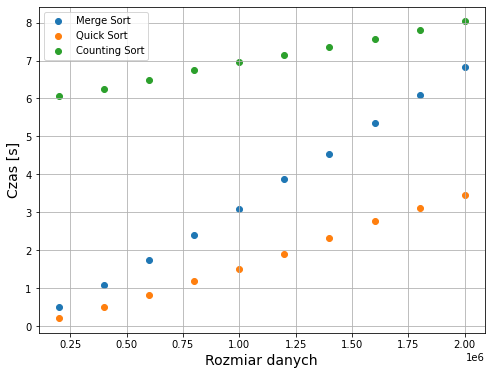

In [45]:
y1 = wyniki_szybkie['Merge Sort']
y2 = wyniki_szybkie['Quick Sort']
y3 = wyniki_szybkie['Counting Sort']

fig = plt.figure()
fig.set_size_inches(8, 6)
plt.scatter(SIZES, y1, label="Merge Sort")
plt.scatter(SIZES, y2, label="Quick Sort")
plt.scatter(SIZES, y3, label="Counting Sort")
plt.xlabel('Rozmiar danych', size=14)
plt.ylabel('Czas [s]', size=14)
plt.legend()
plt.grid()
plt.show()

Pod względem szybkości algorytmy uplasowały się następująco: Quick Sort, Merge Sort, Counting Sort. Czas sortowania rośnie wraz z sortowaniem coraz dłuższej listy danych i dla większych list Counting Sort prawdopodobnie wyprzedziłby Merge Sorta. Wysoki czas wykonywania Counting Sorta wynika z tego, że sorotwane liczby są z dużego zakresu.

In [46]:
df_fast = pd.DataFrame(wyniki_szybkie_max, index=DANE)
df_fast

,Merge Sort,Quick Sort,Counting Sort
Losowe,6.823253,3.447075,8.028384
Posortowane rosnąco,6.690245,3.434935,6.981868
Posortowane malejąco,6.310611,3.439064,7.151022
A-kształtne,6.328529,3.436095,7.164589
V-kształtne,6.149911,3.451263,7.179944


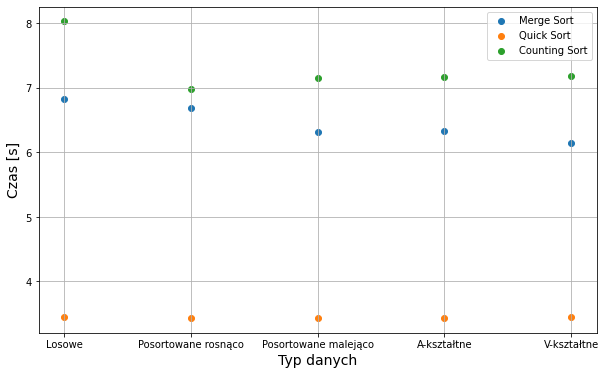

In [47]:
y1 = wyniki_szybkie_max['Merge Sort']
y2 = wyniki_szybkie_max['Quick Sort']
y3 = wyniki_szybkie_max['Counting Sort']

fig = plt.figure()
fig.set_size_inches(10, 6)
plt.scatter(DANE, y1, label="Merge Sort")
plt.scatter(DANE, y2, label="Quick Sort")
plt.scatter(DANE, y3, label="Counting Sort")
plt.xlabel('Typ danych', size=14)
plt.ylabel('Czas [s]', size=14)
plt.legend()
plt.grid()
plt.show()

W przypadku algorytmów szybkich nie widać większej różnicy sortując różne typy danych Quick Sortem. Z kolei posortowanie danych rosnąco dało nam największe skrocenie czasu działania Counting Sorta. Pozostałe typy również przyspieszyły działanie algorytmu. Największą różnicę przy Merge Sorcie da się zauważyć dla danych posortowanych V-kształtnie.